In [1]:
import tensorflow as tf
import numpy as np

# Create a simple CNN model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data
x_train = x_train[..., np.newaxis]  # Add channel dimension
x_test = x_test[..., np.newaxis]

# Compile and train the model briefly
model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

# Convert the trained model to TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enable default quantization

# Convert the model
quantized_model = converter.convert()

# Save the quantized model
with open("quantized_model.tflite", "wb") as f:
    f.write(quantized_model)

print("Quantized model has been saved as 'quantized_model.tflite'")

# Optional: Load and test the quantized model for inference
interpreter = tf.lite.Interpreter(model_path="quantized_model.tflite")
interpreter.allocate_tensors()




Epoch 1/2
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2027 - accuracy: 0.9405 - val_loss: 0.0799 - val_accuracy: 0.9743
Epoch 2/2
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0673 - accuracy: 0.9793 - val_loss: 0.0506 - val_accuracy: 0.9852


INFO:tensorflow:Assets written to: C:\Users\LENOVO\AppData\Local\Temp\tmpn98qmy8c\assets


INFO:tensorflow:Assets written to: C:\Users\LENOVO\AppData\Local\Temp\tmpn98qmy8c\assets


Quantized model has been saved as 'quantized_model.tflite'


Quantized model output: [[3.2195149e-10 4.3767116e-08 5.8189962e-06 5.7354346e-06 5.5490773e-10
  2.1677844e-10 7.9295260e-15 9.9998713e-01 2.9986435e-08 1.2897966e-06]]
Predicted class: 7
Maximum value (confidence): 0.9999871


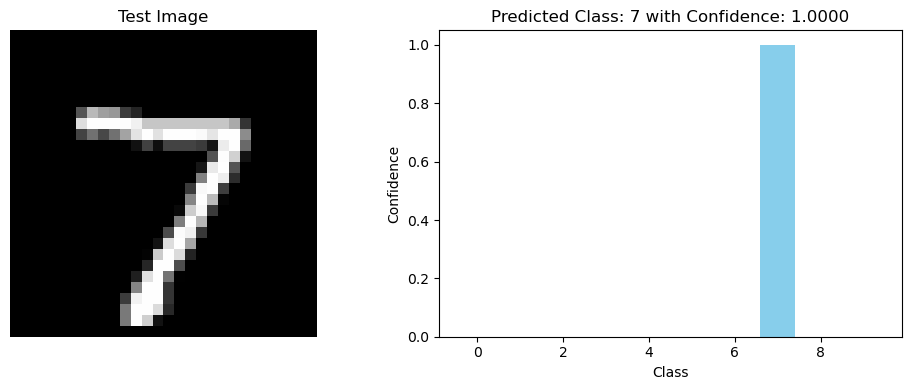

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Ensure the input sample is in FLOAT32 format
sample_input = x_test[0:1].astype(np.float32)  # Take one sample and convert to FLOAT32
interpreter.set_tensor(input_details[0]['index'], sample_input)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Find the maximum value in the model output and its index (predicted class)
max_value = np.max(output_data)
predicted_class = np.argmax(output_data)

print("Quantized model output:", output_data)
print("Predicted class:", predicted_class)
print("Maximum value (confidence):", max_value)

# Plot the test image and the output data
plt.figure(figsize=(10, 4))

# Plot the test image
plt.subplot(1, 2, 1)
plt.imshow(x_test[0].squeeze(), cmap='gray')
plt.title("Test Image")
plt.axis('off')

# Plot the output confidence values
plt.subplot(1, 2, 2)
plt.bar(range(10), output_data[0], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Confidence')
plt.title(f'Predicted Class: {predicted_class} with Confidence: {max_value:.4f}')

plt.tight_layout()
plt.show()
